<a href="https://colab.research.google.com/github/rrizwan98/ML-Projects-Customer-Segmentation/blob/main/mall_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
from zipfile import ZipFile
file_name='/content/drive/MyDrive/mall customer data-set..zip'
with ZipFile (file_name, 'r') as zip: zip.extractall() 

In [6]:
data= pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


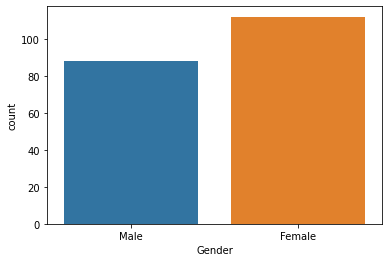

In [9]:
sns.countplot(x="Gender",data=data)

In [10]:
data.drop(['CustomerID'],axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


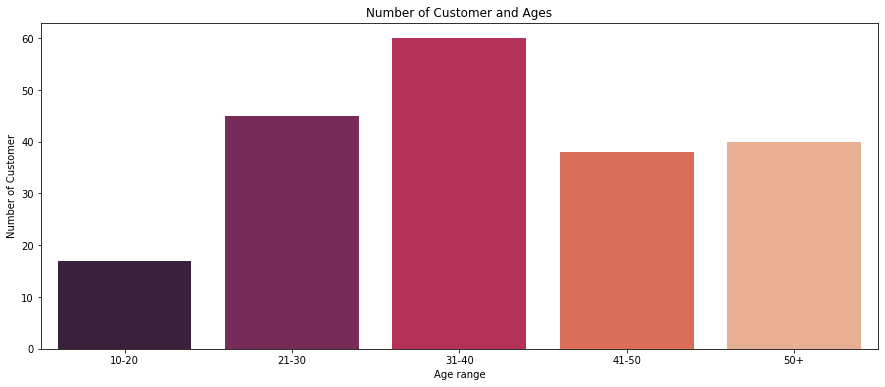

In [14]:
#Count the range of the age of customers
age10_20 = data.Age[(data.Age <= 20) & (data.Age >= 10)]
age21_30 = data.Age[(data.Age <= 30) & (data.Age >= 21)]
age31_40 = data.Age[(data.Age <= 40) & (data.Age >= 31)]
age41_50 = data.Age[(data.Age <= 50) & (data.Age >= 41)]
age50above = data.Age[data.Age >= 51]

x = ["10-20","21-30","31-40","41-50","50+"]
y = [len(age10_20),len(age21_30),len(age31_40),len(age41_50),len(age50above)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age range")
plt.ylabel("Number of Customer")
plt.show()

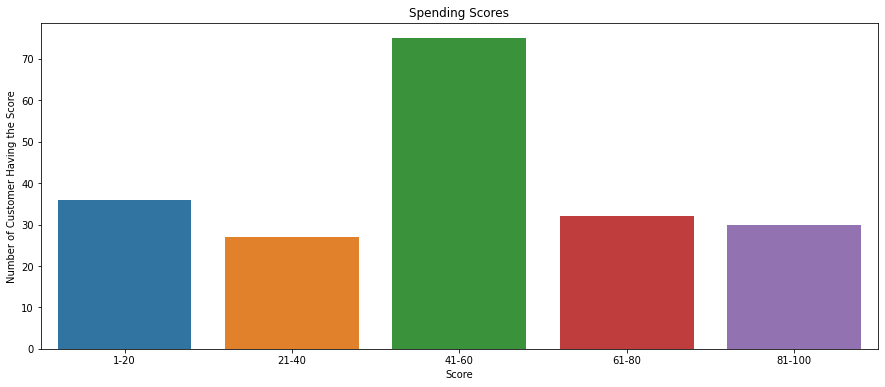

In [15]:
#Number of customers according to their spending scores.

ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

score_range = ["1-20", "21-40", "41-60", "61-80", "81-100"]
number = [len(ss1_20), len(ss21_40), len(ss41_60), len(ss61_80), len(ss81_100)]

plt.figure(figsize=(15,6))
sns.barplot(x=score_range, y=number)
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

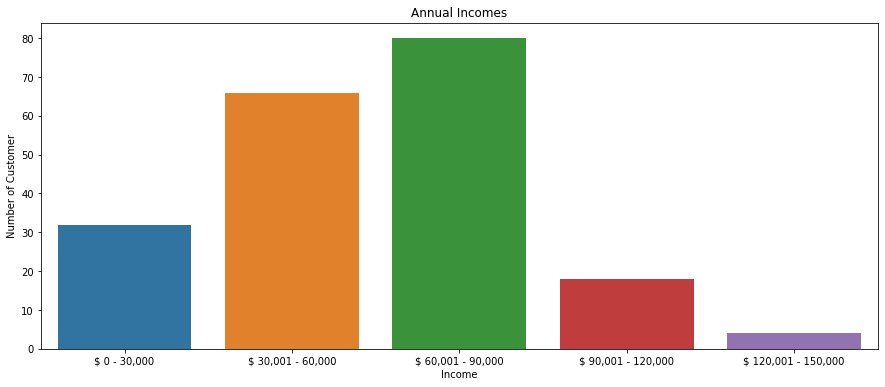

In [16]:
#Number of customers according to their annual income. 

ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

Money_range = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
number = [len(ai0_30), len(ai31_60), len(ai61_90), len(ai91_120), len(ai121_150)]

plt.figure(figsize=(15,6))
sns.barplot(x=Money_range, y=number)
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [23]:
X1 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].values
# X1

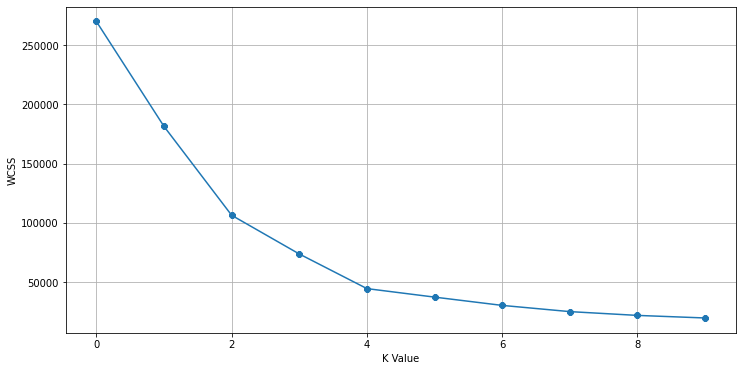

In [22]:
cluster_sumofsquare = [] # Will save the values of all clusters sum of squares, which means how far the observed values is from centroid

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    cluster_sumofsquare.append(kmeans.inertia_)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(cluster_sumofsquare,marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [24]:
model = (KMeans(n_clusters = 5) )

model.fit(X1)
model

KMeans(n_clusters=5)

In [25]:
labels2 = model.labels_
centroids2 = model.cluster_centers_

print(labels2)  #Labels of each point, means to which cluster they belong
print(centroids2) #centroids of each cluster in both columns

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 3 2 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 0 1 3 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[[88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]]


In [26]:
X2 = data[['Annual Income (k$)' , 'Age']].values
# X2

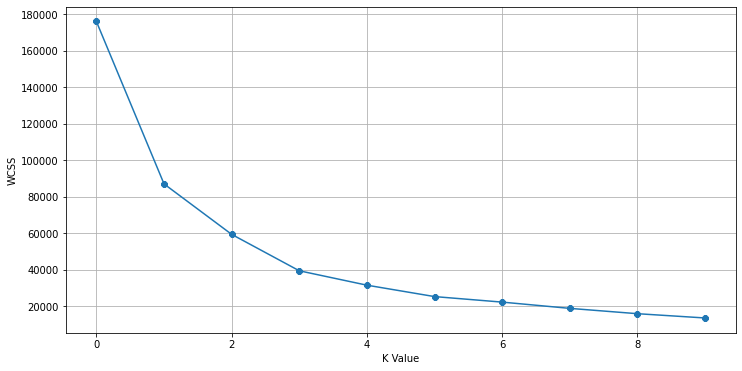

In [27]:
cluster_sumofsquare = [] # Will save the values of all clusters sum of squares, which means how far the observed values is from centroid

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    cluster_sumofsquare.append(kmeans.inertia_)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(cluster_sumofsquare,marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [28]:
model = (KMeans(n_clusters = 4) )

model.fit(X1)
model

KMeans(n_clusters=4)

In [29]:
labels3 = model.labels_
centroids3 = model.cluster_centers_

print(labels3)  #Labels of each point, means to which cluster they belong
print(centroids3) #centroids of each cluster in both columns

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[[87.         18.63157895]
 [48.26       56.48      ]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


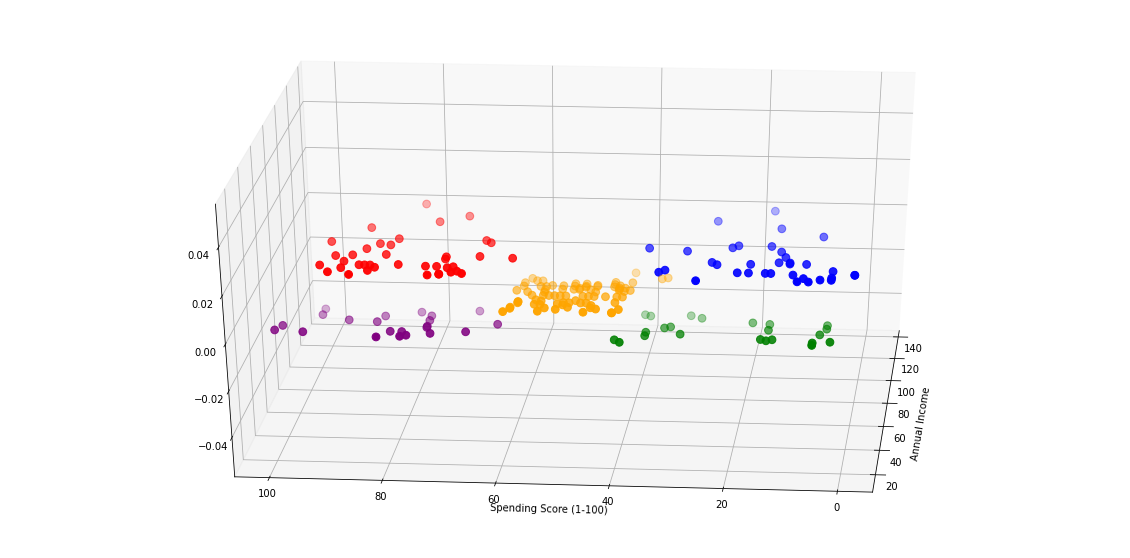

In [30]:
#Clusters in 3d projection

data['label'] = labels2 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
ax.scatter(data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60)
ax.scatter(data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")

plt.show()